In [2]:
import numpy as np
import pickle
import os
from scipy.stats import norm
# Plotting
import matplotlib.pyplot as plt

In [ ]:
def rlba(v = np.array([1, 1]), 
         A = 1, 
         b = 1.5, 
         s = 0.1,
         n_samples = 1000):
    rts = np.zeros((n_samples, 1))
    choices = np.zeros((n_samples, 1))
    
    n_choices = len(v)
    for i in range(n_samples):
        d = np.array([-0.1]*n_choices)
        while np.max(d) < 0:
            k = np.random.uniform(low = 0, high = A, size = n_choices)
            d = np.random.normal(loc = v, scale = s)
            tmp_rt = (b - k) / d
        
        rts[i] = np.min(tmp_rt)
        choices[i]  = np.argmin(tmp_rt)
    
    # Create some dics
    v_dict = {}
    for i in range(n_choices):
        v_dict['v_' + str(i)] = v[i]

    return (rts, choices, {**v_dict,
                           'A': A,
                           'b': b,
                           's': s,
                           'delta_t': 0,
                           'max_t': 1000,
                           'n_samples': n_samples,
                           'simulator': 'lba',
                           'boundary_fun_type': 'none',
                           'possible_choices': [i for i in range(n_choices)]})

In [ ]:
def dlba(rt = 0.5, 
         choice = 0,
         v = np.array([1, 1]),
         A = 1,
         b = 1.5,
         s = 0.1,
         return_log = True):
    n_choices = len(v)
    l_f_t = 0
    
#     if len(s) == 1:
#         s = np.array([s[0]] * n_choices)
    
    for i in range(n_choices):
        if i == choice:
            tmp = flba(rt = rt, A = A, b = b, v = v[i], s = s)
            if tmp < 1e-29:
                tmp = 1e-29
            l_f_t += np.log(tmp)
        else:
            tmp = Flba(rt = rt, A = A, b = b, v = v[i], s = s)
            
            # numerical robustness catches
            if tmp < 1e-29:
                tmp = 1e-29
            if tmp > (1.0 - 1e-29):
                tmp = (1.0 - 1e-29)
            l_f_t += np.log(1.0 - tmp)
            
    if return_log: 
        return l_f_t
    else:
        return np.exp(l_f_t)

In [ ]:
def Flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return (1 + ((1 / A) * ((b - A - (rt * v)) * norm.cdf((b - A - (rt * v)) / (rt * s))) - \
        (b - (rt * v)) * norm.cdf((b - (rt * v)) / (rt * s)) + \
                    (rt * s) * (norm.pdf((b - A - (rt * v)) / (rt * s)) - norm.pdf((b - (rt * v)) / (rt * s)))))

In [ ]:
def flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return ((1 / A) * ( (-v) * norm.cdf((b - A - (rt * v)) / (rt * s)) + \
                     s * norm.pdf((b - A - (rt * v)) / (rt * s)) + \
                     v * norm.cdf((b - (rt * v)) / (rt * s)) + \
                     (-s) * norm.pdf((b - (rt * v)) / (rt * s)) ))

In [ ]:
out = rlba(n_samples = 20000, v = np.array([1.5, 1]), b = 1.5, A = 1)

In [ ]:
out[0][out[1] == 0] = out[0][out[1] == 0] * -1

In [ ]:
import pickle
out = pickle.load(open('/media/data_cifs/afengler/tmp/lba_8085c794bf7a11e9b003530bce13c5b4.pickle', 'rb'))

In [ ]:
out[0][out[1] == 0] = out[0][out[1] == 0] * (-1)

In [ ]:
plt.hist(out[0], bins = 50, density = True, alpha = 0.3)
plt.plot(-my_grid, np.exp(f_test_vals[:, 0]), color = 'green')
plt.plot(my_grid, np.exp(f_test_vals[:, 1]), color = 'green')

In [ ]:
[i for i in range(4)]

In [ ]:
out

In [3]:
#import lba
import lba
import clba
import numpy as np
import pickle
import os
import kde_training_utilities as kde_utils
import kde_class as kdec

In [ ]:
#%%timeit -n 1 -r 5
out_p = lba.rlba(v = np.array([1.1657, 1.118401]), 
               A = 0.852575, 
               b = 1.860735, 
               s = 0.170644,
               n_samples = 1000)

In [4]:
#%%timeit -n 1 -r 5
out_c = clba.rlba(v = np.array([1, 1]), 
                  A = 1.0, 
                  b = 2, 
                  s = 0.4,
                  ndt = 0.4,
                  n_samples = 2500)

my_grid = np.linspace(0.01, 4.0, 1000)
f_test_vals = np.zeros((len(my_grid),2))
for c in range(2):
    cnt = 0
    for i in my_grid:
        f_test_vals[cnt, c] = clba.dlba(rt = i, choice = c, v = np.array([1, 1]), ndt = 0.4, b = 2, s = 0.4)
        cnt += 1

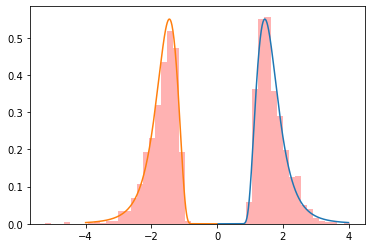

In [5]:
out_c[0][out_c[1] == 0] = out_c[0][out_c[1] == 0] * (-1)
#out_p[0][out_p[1] == 0] = out_p[0][out_p[1] == 0] * (-1)

plt.hist(out_c[0], bins = 50, density = True, alpha = 0.3, color = 'red')
plt.plot(my_grid, np.exp(f_test_vals[:, 1]))
plt.plot(-my_grid, np.exp(f_test_vals[:, 0]))
#plt.hist(out_p[0], bins = 50, density = True, alpha = 0.3, color = 'black')

In [ ]:
my_lbakde = kdec.logkde(out)

In [ ]:
os.listdir('/media/data_cifs/afengler/data/kde/lba/base_simulations_20000')[0]

In [ ]:
kde_out = my_lbakde.kde_sample()

In [ ]:
np.max(kde_out[0])

In [ ]:
out_p

In [ ]:
np.random.uniform(low = 0, high = 0)

In [ ]:
a = [1]

In [ ]:
rts = np.random.normal(size = 1000) + 2
choices = np.random.choice(2, size = 1000)

In [6]:
%%timeit -n 1 -r 5
print(clba.batch_dlba2(rt = np.squeeze(out_c[0]), choice = np.squeeze(out_c[1]), v = np.array([1, 1]),
                       A = 0.9,
                       b = 2, 
                       s = 0.4,
                       ndt = 0.4))

-46668.66247944382
-46668.66247944382
-46668.66247944382
-46668.66247944382
-46668.66247944382
8.67 ms ± 1.31 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [7]:
#%%timeit -n 1 -r 5
tmp = 0
for i in range(len(out_c[0])):
    tmp += clba.dlba(rt = out_c[0][i], choice = out_c[1][i], ndt = 0.4, A = 0.9, b = 2)
    #if i % 100 == 0:
        #print(i)
print(tmp)

[-49802.66851898]


In [ ]:
A = 1
b = 1.5
v = np.array([1, 1])
s = 0.1
rt = np.squeeze(out_c[0])
eps = 1e-16

In [ ]:
tmp = np.zeros((2, len(rt), 2))
tmp[0, :, 0] = clba.flba(rt = rt, A = A, b = b, v = v[0], s = s)
tmp[0, tmp[0, :, 0] < eps, 0] = np.log(eps)
tmp[0, :, 1] = clba.flba(rt = rt, A = A, b = b, v = v[1], s = s)
tmp[0, tmp[0, :, 1] < eps, 1] = np.log(eps)
tmp[1, :, 0] = 1 - clba.Flba(rt = rt, A = A, b = b, v = v[1], s = s)
tmp[1, tmp[1, : , 0] < eps, 0] = np.log(eps)
tmp[1, :, 1] = 1 - clba.Flba(rt = rt, A = A, b = b, v = v[0], s = s)
tmp[1, tmp[1, : , 1] < eps, 1] = np.log(eps)
tmp = tmp[0, :, :] + tmp [1, :, :]
tmp[rt <= 0, :] = np.log(np.sqrt(eps))

In [ ]:
np.min(tmp)

In [ ]:
np.log(0.000000000000000000000000000000001)